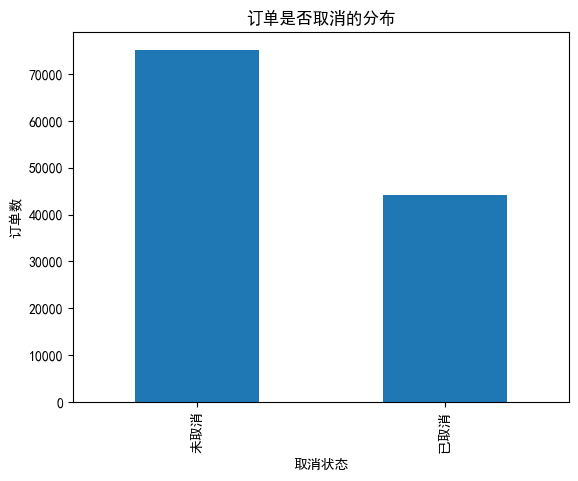

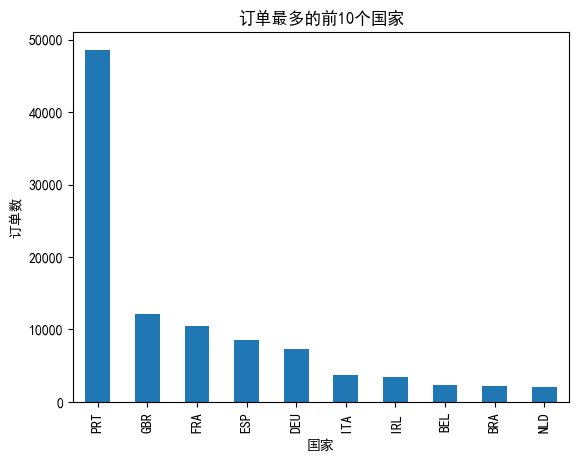

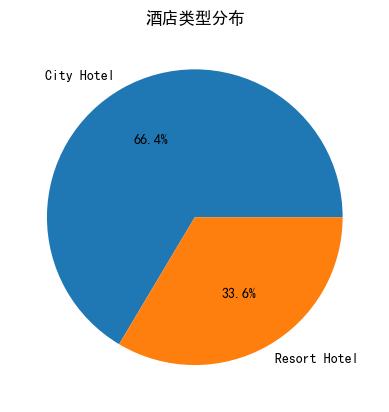

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('hotel_bookings.csv')




# 目标变量分布
cancel_counts = df['is_canceled'].value_counts()
cancel_counts.plot(kind='bar')
plt.xticks([0, 1], ['未取消', '已取消'])
plt.title('订单是否取消的分布')
plt.xlabel('取消状态')
plt.ylabel('订单数')
plt.show()


# 国家分布Top 10

df['country'].value_counts().head(10).plot(kind='bar')
plt.title('订单最多的前10个国家')
plt.xlabel('国家')
plt.ylabel('订单数')
plt.show()

# 酒店类型分布
df['hotel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('酒店类型分布')
plt.ylabel('')
plt.show()


In [27]:
import pandas as pd

df = pd.read_csv('hotel_bookings.csv')

features = [
    'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]
label = 'is_canceled'

# 原始数据行数
print("原始数据形状：", df[features + [label]].shape)

# 删除缺失
df_clean = df[features + [label]].dropna(subset=features + [label])

print("删除缺失后数据形状：", df_clean.shape)
print("共删除样本数：", df.shape[0] - df_clean.shape[0])


原始数据形状： (119390, 25)
删除缺失后数据形状： (118898, 25)
共删除样本数： 492


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 分类特征编码
categorical_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type'
]
df_model = df_clean.copy()
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# 特征与标签
features = [
    'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]
label = 'is_canceled'

X = df_model[features]
y = df_model[label]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 随机森林
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("随机森林结果：")
print("准确率：", accuracy_score(y_test, y_pred_rf))
print("分类报告：\n", classification_report(y_test, y_pred_rf))
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred_rf))

# Adaboost
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("\nAdaboost结果：")
print("准确率：", accuracy_score(y_test, y_pred_ab))
print("分类报告：\n", classification_report(y_test, y_pred_ab))
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred_ab))


随机森林结果：
准确率： 0.8851135407905804
分类报告：
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     14851
           1       0.88      0.80      0.84      8929

    accuracy                           0.89     23780
   macro avg       0.88      0.87      0.88     23780
weighted avg       0.88      0.89      0.88     23780

混淆矩阵：
 [[13875   976]
 [ 1756  7173]]

Adaboost结果：
准确率： 0.815138772077376
分类报告：
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     14851
           1       0.83      0.64      0.72      8929

    accuracy                           0.82     23780
   macro avg       0.82      0.78      0.79     23780
weighted avg       0.82      0.82      0.81     23780

混淆矩阵：
 [[13691  1160]
 [ 3236  5693]]


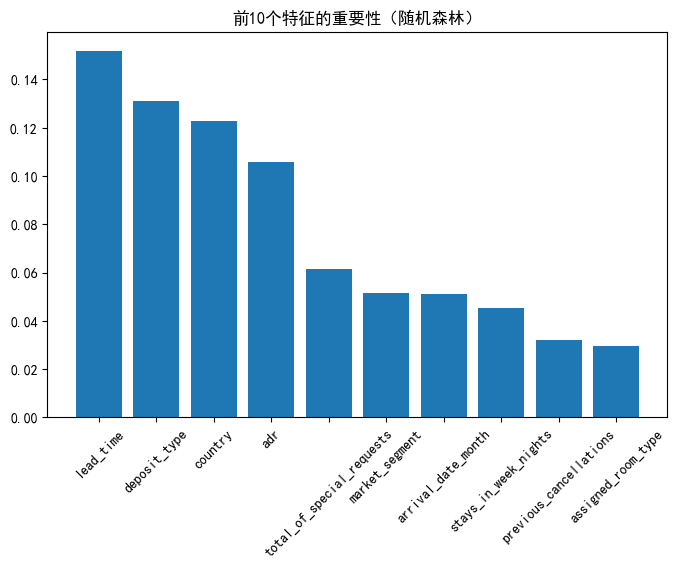

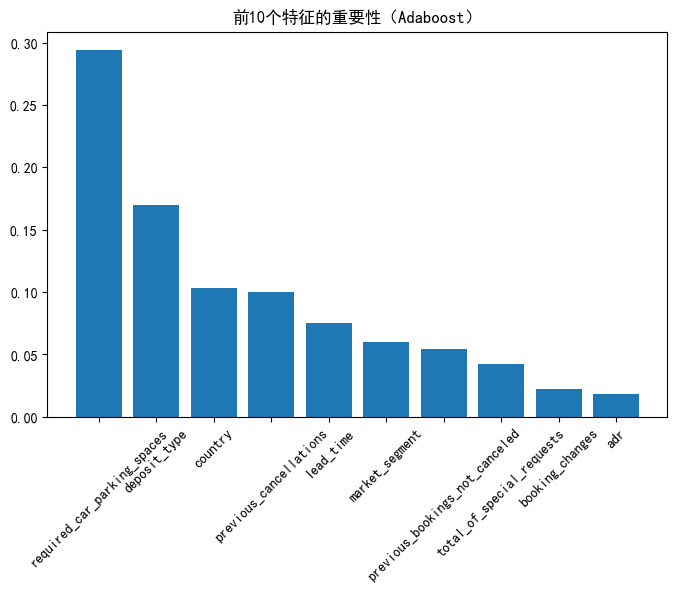

In [29]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']       
plt.rcParams['axes.unicode_minus'] = False          

importances = rf.feature_importances_
feat_names = X.columns
indices = importances.argsort()[::-1][:10]
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=45)
plt.title("前10个特征的重要性（随机森林）")
plt.show()


import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

importances_ab = ab.feature_importances_
indices_ab = importances_ab.argsort()[::-1][:10]
plt.figure(figsize=(8,5))
plt.bar(range(len(indices_ab)), importances_ab[indices_ab])
plt.xticks(range(len(indices_ab)), [feat_names[i] for i in indices_ab], rotation=45)
plt.title("前10个特征的重要性（Adaboost）")
plt.show()



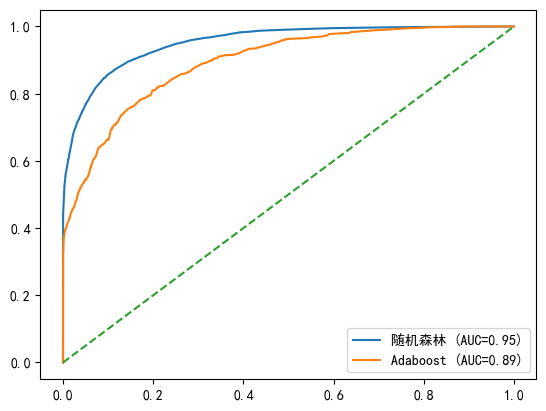

In [30]:
plt.plot(fpr_rf, tpr_rf, label='随机森林 (AUC=%.2f)' % auc_rf)
plt.plot(fpr_ab, tpr_ab, label='Adaboost (AUC=%.2f)' % auc_ab)
plt.plot([0, 1], [0, 1], '--')
plt.legend()
plt.show()


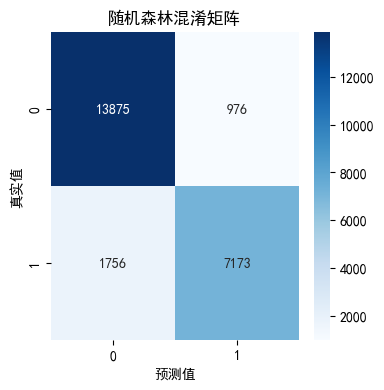

In [31]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("随机森林混淆矩阵")
plt.xlabel("预测值")
plt.ylabel("真实值")
plt.show()


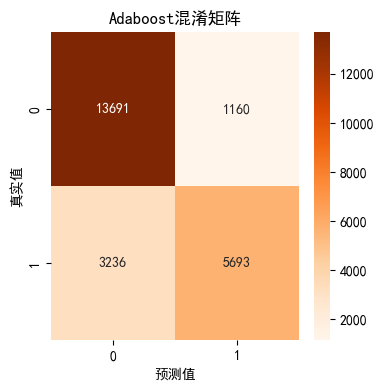

In [32]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_ab), annot=True, fmt='d', cmap='Oranges')
plt.title("Adaboost混淆矩阵")
plt.xlabel("预测值")
plt.ylabel("真实值")
plt.show()
